### Exercise 2: Quantum Physics Dataset Classification

Consider the subset of the Quantum Physics Dataset provided by Cornell University. The goal is to learn a classification rule that differentiates between two types of particles generated in high energy collider experiments.

#### **Optimization Problem**

Classify the data by solving the following minimization problem:
$$
\min_w J(w) = \frac{1}{N} \sum_i J_i(w),
$$
where:
$$
J_i(w) = L(w^T x_i, y_i),
$$
and:
$$
L(s, y) = \log(1 + \exp(-sy)).
$$



In [26]:
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

X = np.genfromtxt("./data/X.dat")  # Features
y = np.genfromtxt("./data/y.dat")  # Labels (+1, -1)

print(X.shape)
print(y.shape)

n_samples, n_features = X.shape

(10000, 46)
(10000,)


1. **Implement the Stochastic Gradient Descent Algorithm (SGD)**:
   - Use a batch size of 1.
   - Use a constant learning rate $\eta = 0.5$.
   - Perform 5000 iterations.
   - Initialize the weight vector $w$ to zero.

In [22]:
# array with random gaussian initialization
def initialize_params(dim=46):
    return jnp.array([0.0 for i in range(dim)])
initialize_params()


Array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
def loss(X, y, w):
    """Compute L(w^T x_i, y_i) for a batch of data points."""
    s = jnp.dot(X, w)  # Correct order: (batch_size, num_features) @ (num_features,)
    return jnp.mean(jnp.log(1 + jnp.exp(-s * y)))
loss_jit = jax.jit(loss)
grad_jit = jax.jit(jax.grad(loss, argnums=2))

In [31]:
np.random.seed(0)
params = initialize_params()
lr = 0.5
batch_size = 1
num_epochs = 5000
loss_history = list()
for i in tqdm(range(num_epochs)):
    batch_idx = np.random.choice(n_samples, batch_size)
    grad = grad_jit(X[batch_idx, :], y[batch_idx], params)
    params -= lr * grad
    loss_history.append(loss_jit(X, y,params))

print(loss_jit(X, y, params))



  0%|          | 0/5000 [00:00<?, ?it/s]

3.7903569



2. **Repeat the Minimization Using Dynamic Learning Rate**:
   Update the learning rate $\eta_k$ using the following formula:
   $$
   \eta_k = \frac{\eta_0}{1 + \frac{k}{100}},
   $$
   where:
   - $k$ is the iteration number.
   - $\eta_0 = 0.05$.

In [28]:
np.random.seed(0)
num_epochs = 5000
batch_size = 1
eta = 0.5

params = initialize_params()
loss_dyn_lr_history = list()
# Perform SGD with dynamic learning rate
for epoch in tqdm(range(num_epochs)):
    learning_rate = eta / (1 + epoch / 100)
    batch_idx = np.random.choice(n_samples, batch_size)
    grad = grad_jit(X[batch_idx, :], y[batch_idx], params)
    params -= learning_rate * grad
    loss_dyn_lr_history.append(loss_jit(X, y, params))

# Print final loss
print(loss_jit(X, y, params))
    

  0%|          | 0/5000 [00:00<?, ?it/s]

0.59104127


#### **Goals**
- Compare the results from the two tasks.

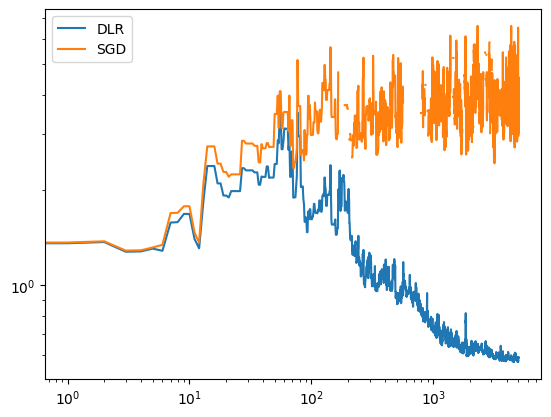

In [32]:
plt.loglog(loss_dyn_lr_history, label="DLR")
plt.loglog(loss_history, label="SGD")
plt.legend()